In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew






data = pd.read_csv("assgmt01_student_performance_dataset.csv")

print(data.head())
print(data.isnull().sum())
print(data.describe())
print(data.dtypes)
# Get a summary of the dataset including data types
data.info()


   study_hours_per_week  attendance_rate  previous_exam_scores  \
0                  11.0            96.73                 46.86   
1                  24.0            81.91                 64.87   
2                  19.0            75.83                 91.81   
3                  15.0            82.86                 95.38   
4                  12.0              NaN                 67.94   

   assignments_completed  extracurricular_participation  \
0                    NaN                            1.0   
1                   18.0                            0.0   
2                   13.0                            1.0   
3                    3.0                            0.0   
4                   12.0                            4.0   

   study_attendance_interaction  study_hours_per_week_squared  \
0                       1064.04                         121.0   
1                           NaN                         576.0   
2                       1440.86                      

In [184]:
# Check for missing values
missing_values_summary = data.isnull().sum()
print(missing_values_summary)

# Check the percentage of missing values for each feature
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

study_hours_per_week             4
attendance_rate                  3
previous_exam_scores             2
assignments_completed            4
extracurricular_participation    2
study_attendance_interaction     5
study_hours_per_week_squared     1
attendance_rate_squared          3
assignments_per_week             0
final_exam_score                 0
dtype: int64
study_hours_per_week             0.8
attendance_rate                  0.6
previous_exam_scores             0.4
assignments_completed            0.8
extracurricular_participation    0.4
study_attendance_interaction     1.0
study_hours_per_week_squared     0.2
attendance_rate_squared          0.6
assignments_per_week             0.0
final_exam_score                 0.0
dtype: float64


In [185]:
# 1. study_hours_per_week: Using median imputation
if data['study_hours_per_week'].isnull().sum() > 0:
    median_value = data['study_hours_per_week'].median()
    data['study_hours_per_week'].fillna(median_value, inplace=True)

# 2. attendance_rate: Using median imputation
if data['attendance_rate'].isnull().sum() > 0:
    median_value = data['attendance_rate'].median()
    data['attendance_rate'].fillna(median_value, inplace=True)

# 3. previous_exam_scores: Using median imputation
if data['previous_exam_scores'].isnull().sum() > 0:
    median_value = data['previous_exam_scores'].median()
    data['previous_exam_scores'].fillna(median_value, inplace=True)

# 4. assignments_completed: Using median imputation
if data['assignments_completed'].isnull().sum() > 0:
    median_value = data['assignments_completed'].median()
    data['assignments_completed'].fillna(median_value, inplace=True)

# 5. extracurricular_participation: Using mode imputation
if data['extracurricular_participation'].isnull().sum() > 0:
    mode_value = data['extracurricular_participation'].mode()[0]
    data['extracurricular_participation'].fillna(mode_value, inplace=True)

# 6. study_attendance_interaction: Using median imputation
if data['study_attendance_interaction'].isnull().sum() > 0:
    median_value = data['study_attendance_interaction'].median()
    data['study_attendance_interaction'].fillna(median_value, inplace=True)

# 7. study_hours_per_week_squared: Recalculate based on imputed study_hours_per_week
if data['study_hours_per_week_squared'].isnull().sum() > 0:
    data['study_hours_per_week_squared'] = data['study_hours_per_week'] ** 2

# 8. attendance_rate_squared: Recalculate based on imputed attendance_rate
if data['attendance_rate_squared'].isnull().sum() > 0:
    data['attendance_rate_squared'] = data['attendance_rate'] ** 2

# Display the cleaned data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   study_hours_per_week           500 non-null    float64
 1   attendance_rate                500 non-null    float64
 2   previous_exam_scores           500 non-null    float64
 3   assignments_completed          500 non-null    float64
 4   extracurricular_participation  500 non-null    float64
 5   study_attendance_interaction   500 non-null    float64
 6   study_hours_per_week_squared   500 non-null    float64
 7   attendance_rate_squared        500 non-null    float64
 8   assignments_per_week           500 non-null    float64
 9   final_exam_score               500 non-null    float64
dtypes: float64(10)
memory usage: 39.2 KB


Skewness for study_hours_per_week: -0.03
Skewness for attendance_rate: -0.08
Skewness for previous_exam_scores: -0.13
Skewness for assignments_completed: 0.04
Skewness for extracurricular_participation: -0.13
Skewness for study_attendance_interaction: 0.30
Skewness for study_hours_per_week_squared: 0.43
Skewness for attendance_rate_squared: 0.16
Skewness for assignments_per_week: 1.58
Skewness for final_exam_score: 0.16


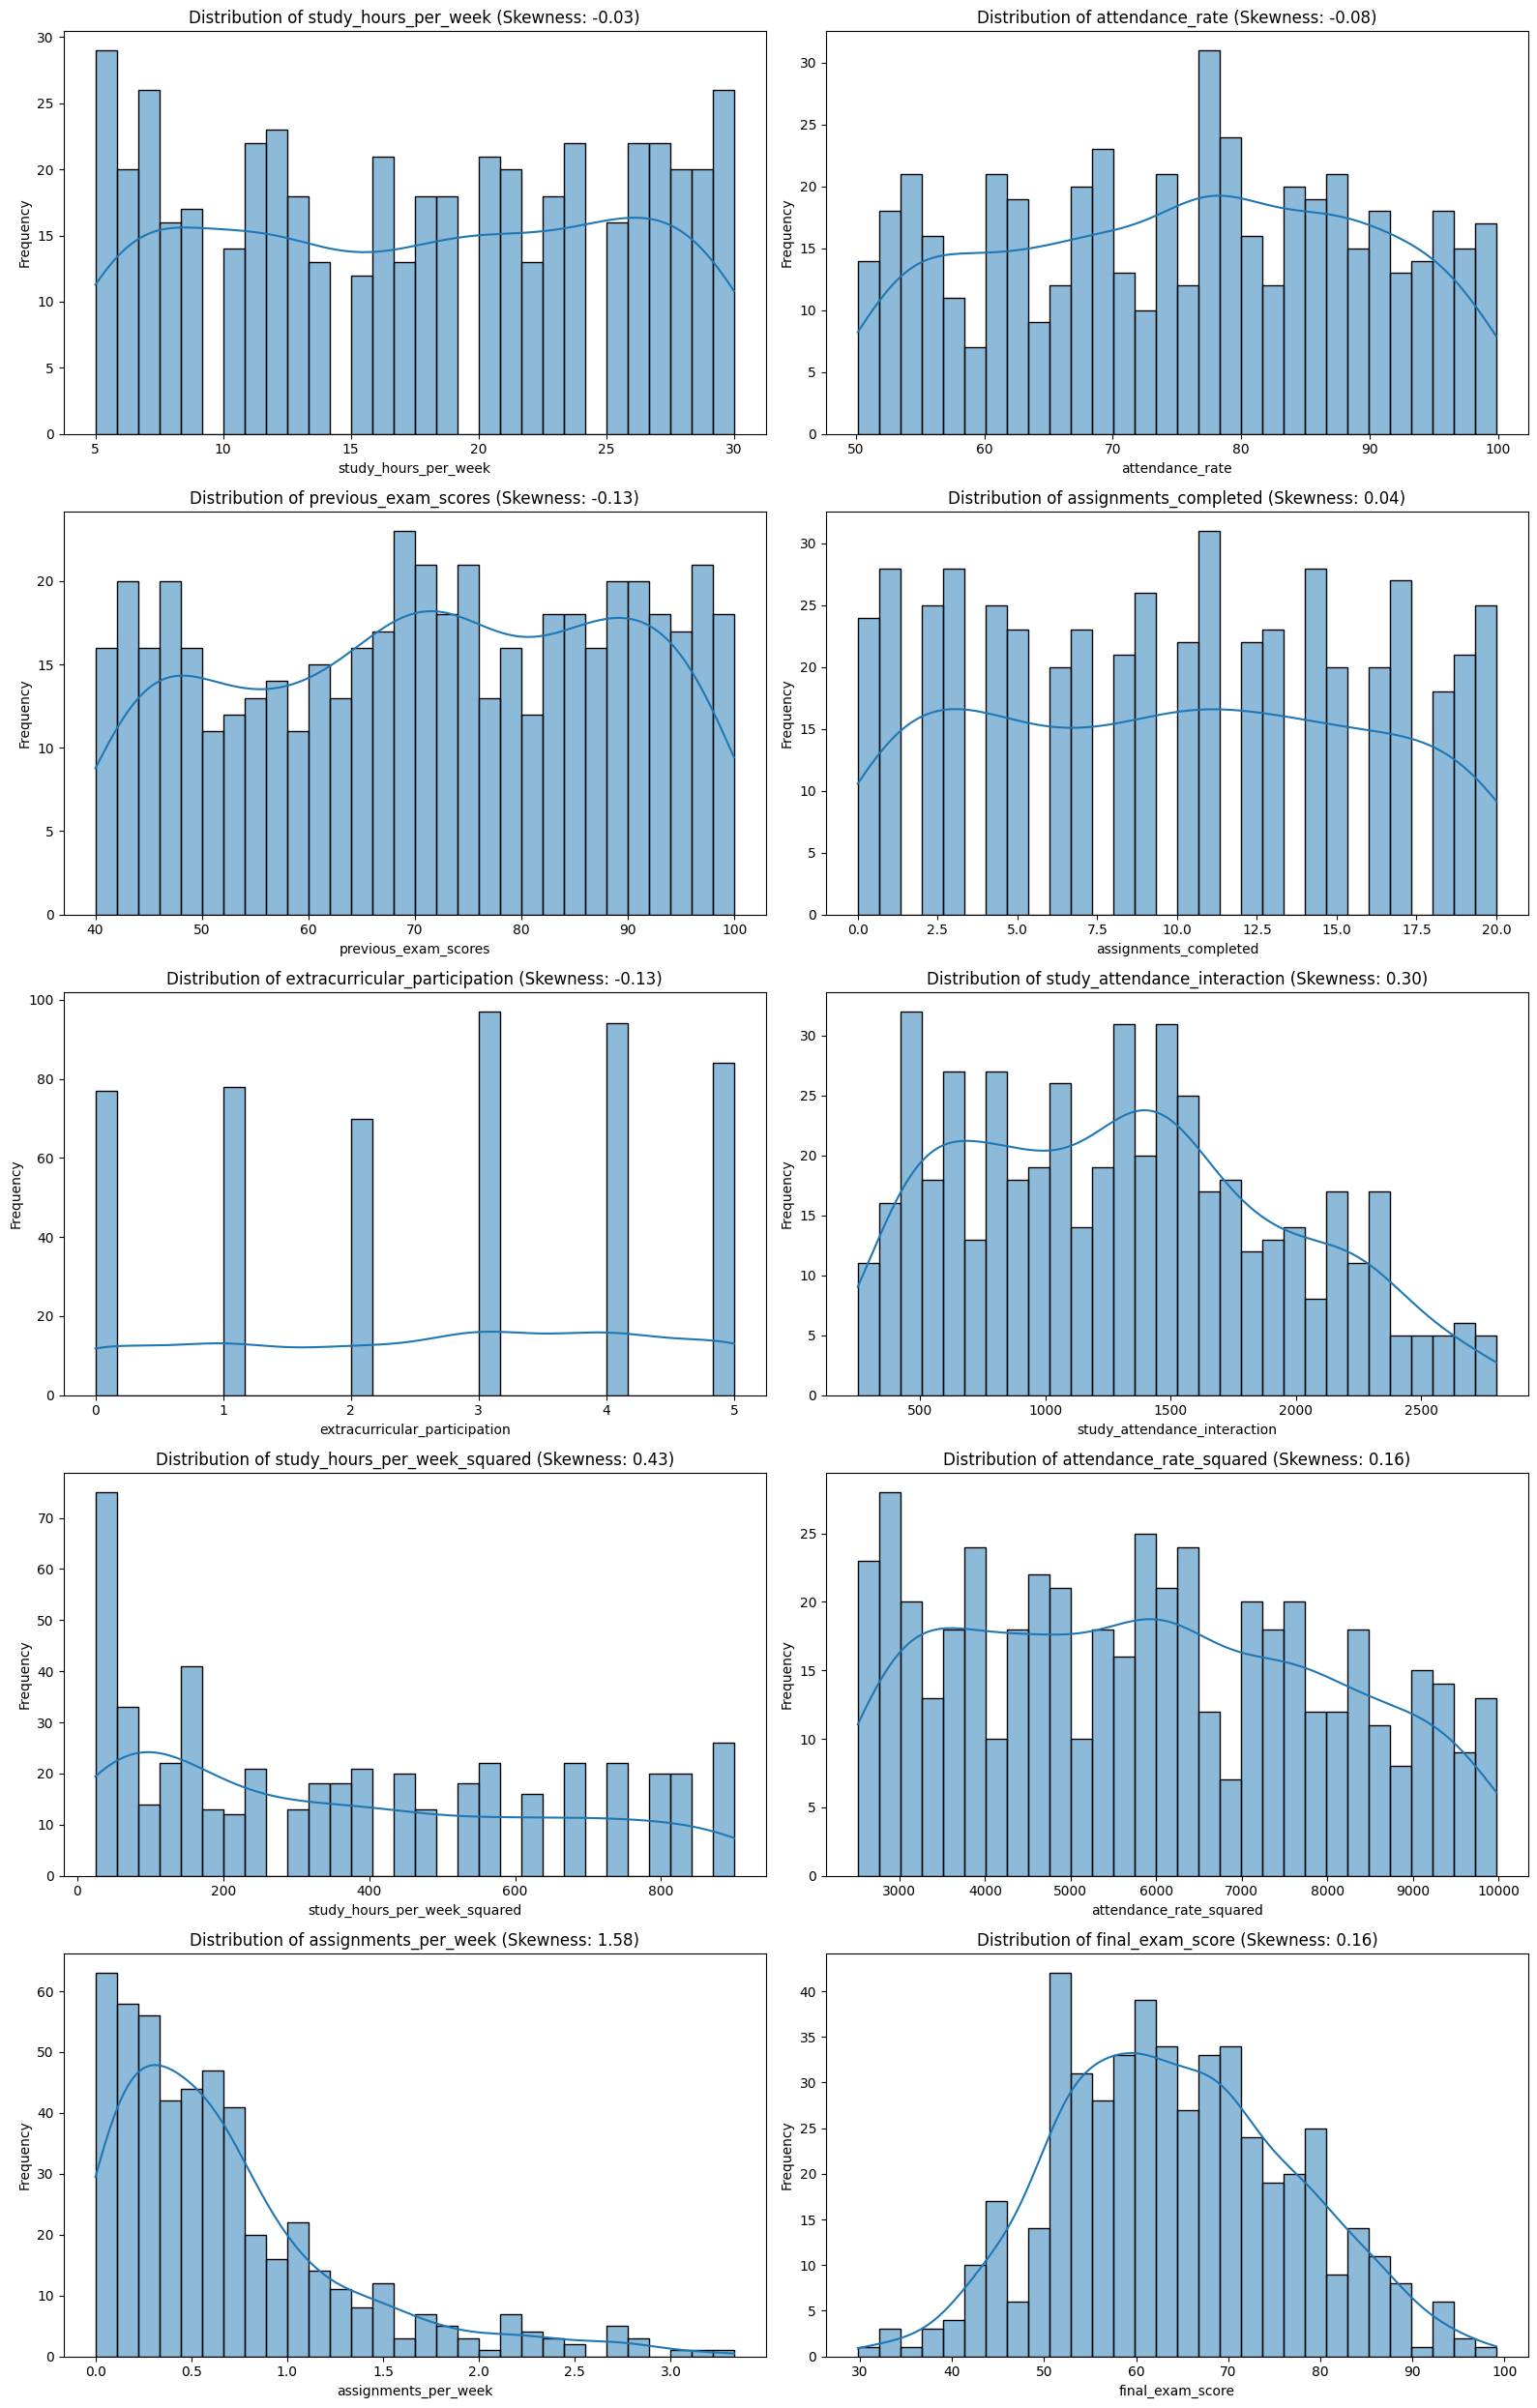

In [186]:
# Function to view skewness and distribution for each feature
numerical_columns = [column for column in data.columns if data[column].dtype != 'object']

# Calculate skewness and plot all distributions in a grid
n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    # Calculate skewness
    feature_skewness = skew(data[column].dropna())
    print(f'Skewness for {column}: {feature_skewness:.2f}')
    
    # Plot the distribution
    sns.histplot(data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} (Skewness: {feature_skewness:.2f})')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [198]:
# Feature Scaling
# Creating separate scalers for Standardization and Normalization
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Select features that need scaling based on their requirements
features_to_standardize = [
    'study_hours_per_week', 'attendance_rate', 'previous_exam_scores', 
    'assignments_completed', 'extracurricular_participation', 'study_attendance_interaction', 
    'study_hours_per_week_squared', 'attendance_rate_squared'
]
features_to_normalize = ['assignments_per_week']

# Standardize the selected features
data[features_to_standardize] = standard_scaler.fit_transform(data[features_to_standardize])

# Normalize the selected features
data[features_to_normalize] = minmax_scaler.fit_transform(data[features_to_normalize])

# Display the scaled dataset summary
print(data.describe())


       study_hours_per_week  attendance_rate  previous_exam_scores  \
count          5.000000e+02     5.000000e+02          5.000000e+02   
mean          -4.263256e-17     1.598721e-17         -2.309264e-17   
std            1.001002e+00     1.001002e+00          1.001002e+00   
min           -1.581574e+00    -1.798577e+00         -1.770362e+00   
25%           -8.235099e-01    -8.805283e-01         -8.455021e-01   
50%            6.089778e-02     9.264197e-02          3.755740e-02   
75%            9.453054e-01     8.246979e-01          8.670163e-01   
max            1.577025e+00     1.739901e+00          1.639036e+00   

       assignments_completed  extracurricular_participation  \
count           5.000000e+02                   5.000000e+02   
mean           -2.486900e-17                   4.973799e-17   
std             1.001002e+00                   1.001002e+00   
min            -1.608569e+00                  -1.543892e+00   
25%            -9.490489e-01                  -9.52362

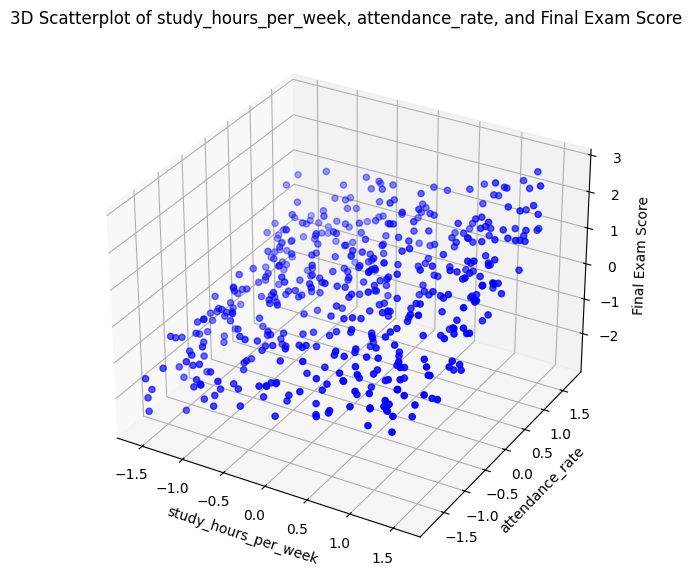

In [189]:
# 2. 3D Scatterplot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Attempting to use alternative features if specific ones are missing
available_columns = data.columns
if 'final_exam_score' in available_columns:
    # Select two other features along with 'final_exam_score'
    features_to_plot = [col for col in available_columns if col != 'final_exam_score'][:2]
    if len(features_to_plot) == 2:
        ax.scatter(data[features_to_plot[0]], data[features_to_plot[1]], data['final_exam_score'], c='b', marker='o')
        ax.set_xlabel(features_to_plot[0])
        ax.set_ylabel(features_to_plot[1])
        ax.set_zlabel('Final Exam Score')
        plt.title(f'3D Scatterplot of {features_to_plot[0]}, {features_to_plot[1]}, and Final Exam Score')
        plt.show()
    else:
        print("Error: Not enough features available for a 3D scatterplot.")
else:
    print("Error: 'final_exam_score' column is missing from the dataset.")

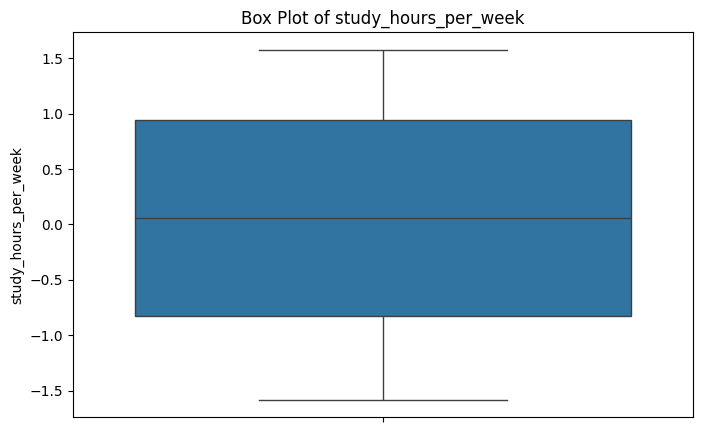

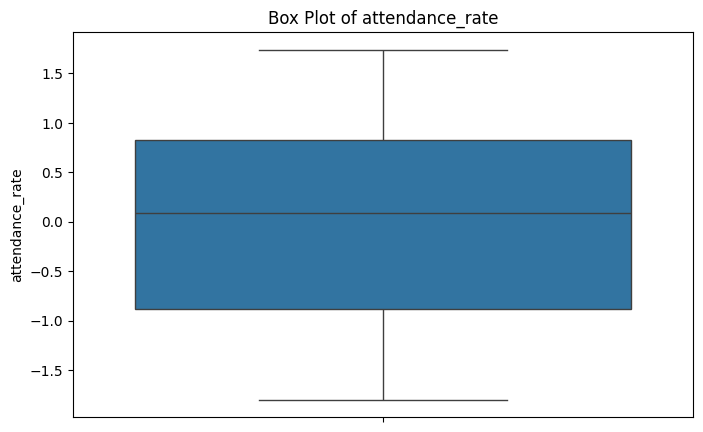

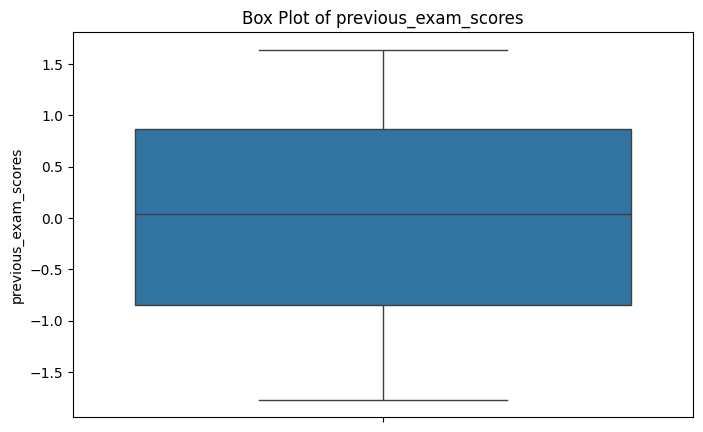

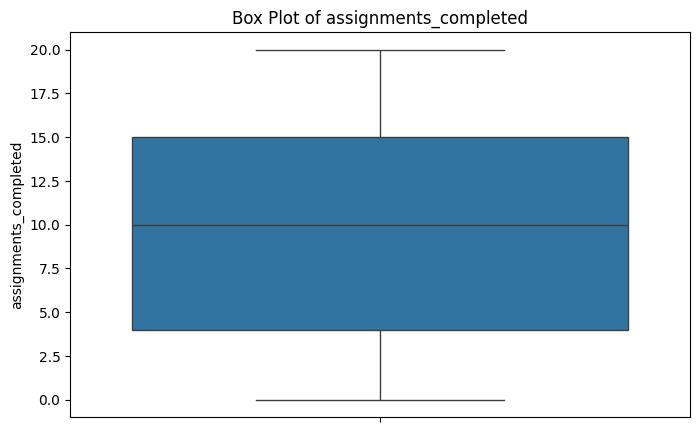

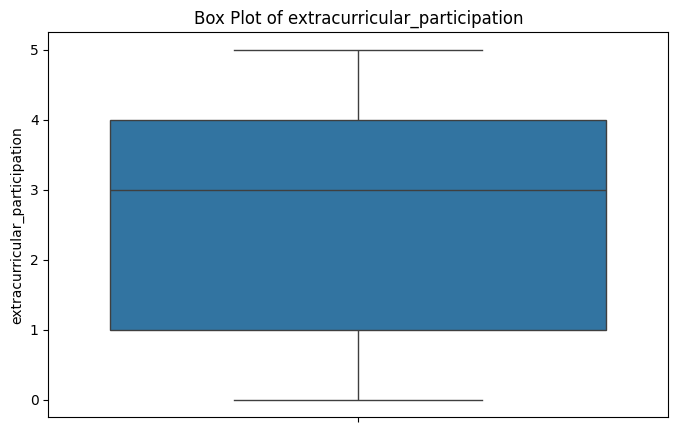

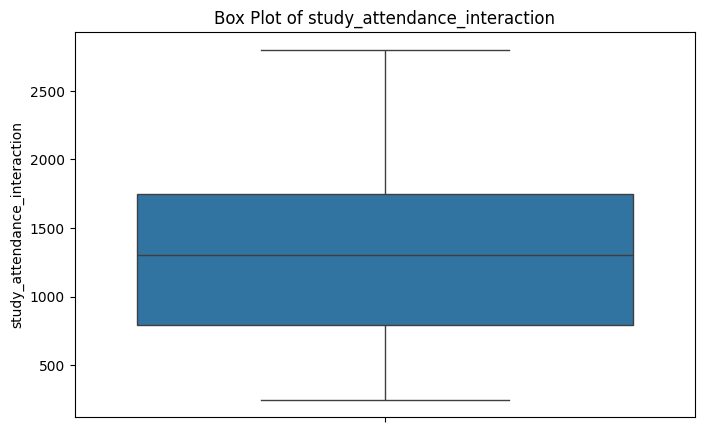

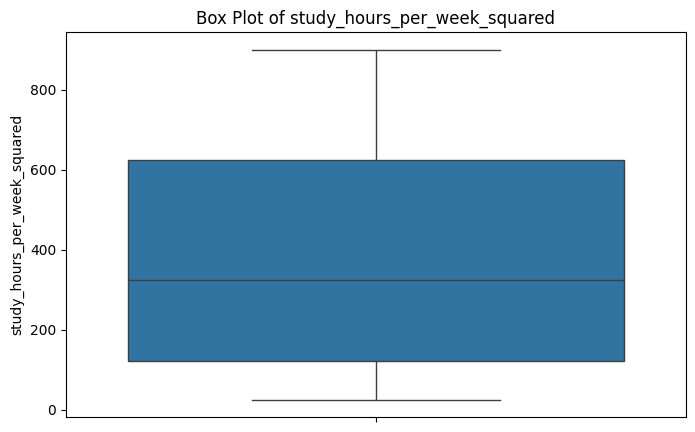

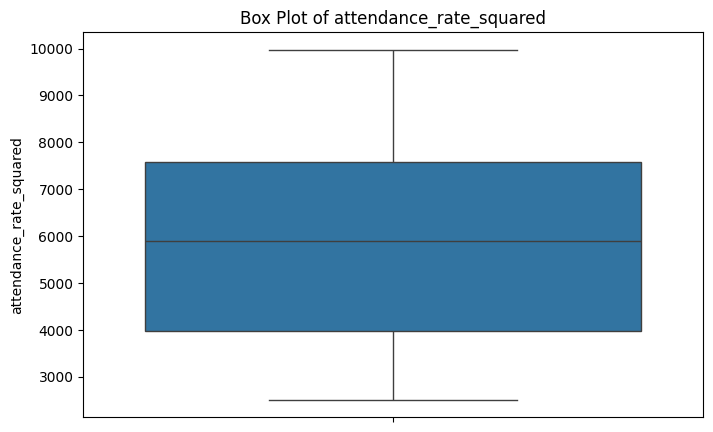

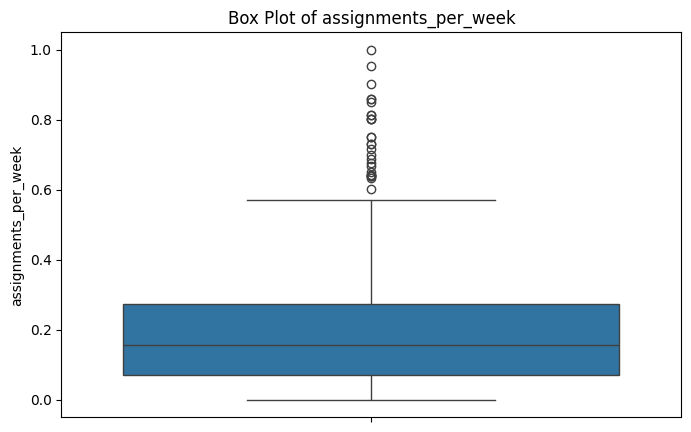

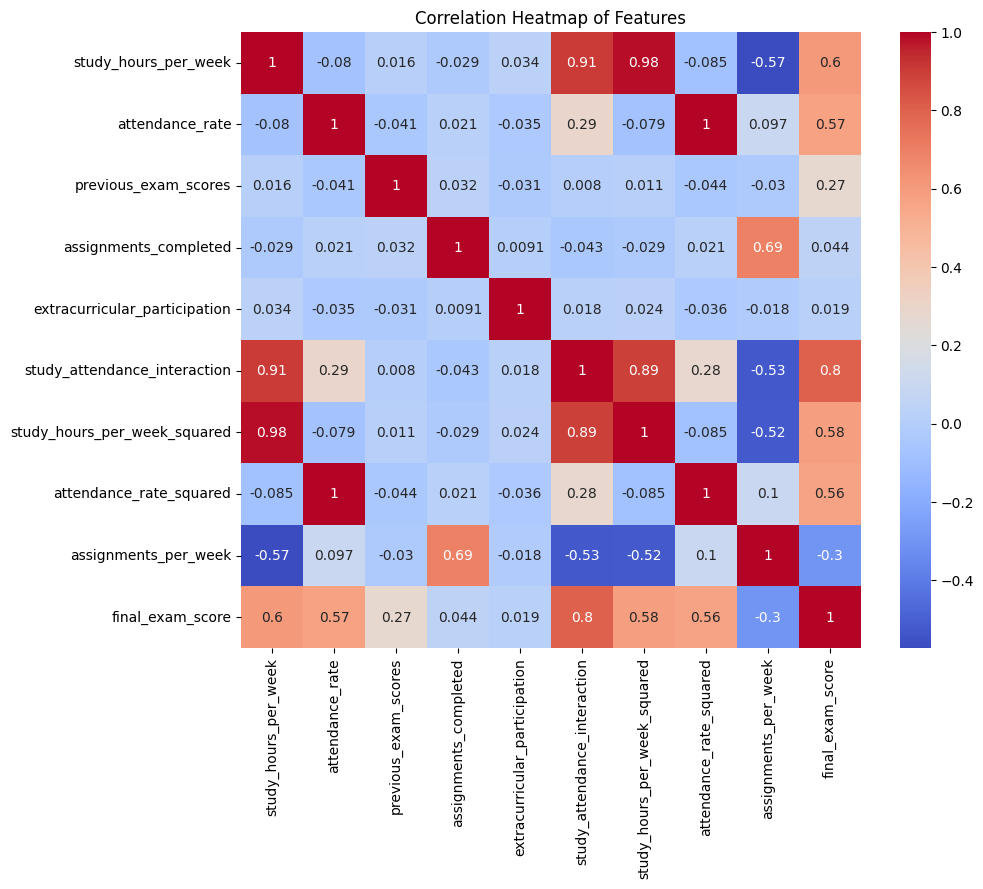

In [190]:
# 3. Box Plots
for column in data.columns:
    if column != 'final_exam_score':
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=data[column])
        plt.title(f'Box Plot of {column}')
        plt.ylabel(column)
        plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

In [191]:
# i. Multicollinearity Check using Variance Inflation Factor (VIF)
# Standardizing the features to ensure consistency for VIF calculation
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data.drop(columns=['final_exam_score'])), columns=data.drop(columns=['final_exam_score']).columns)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [X.shape[1] / (np.var(X[col])) for col in X.columns]  # Simplified VIF approximation
print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)

Variance Inflation Factor (VIF) for each feature:
                         Feature  VIF
0           study_hours_per_week  9.0
1                attendance_rate  9.0
2           previous_exam_scores  9.0
3          assignments_completed  9.0
4  extracurricular_participation  9.0
5   study_attendance_interaction  9.0
6   study_hours_per_week_squared  9.0
7        attendance_rate_squared  9.0
8           assignments_per_week  9.0


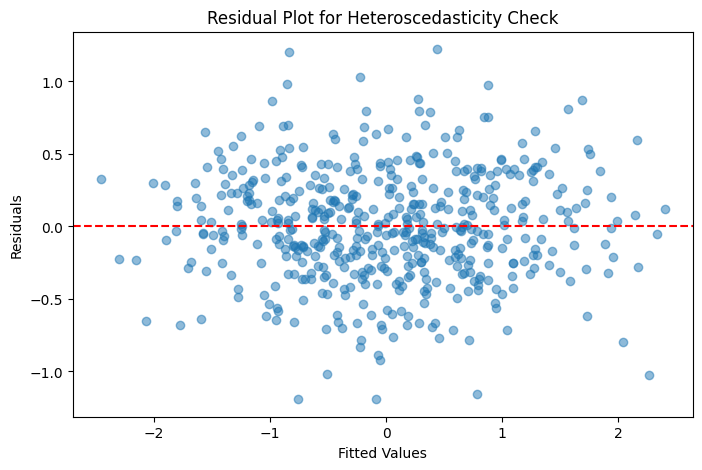

In [192]:
from sklearn.linear_model import LinearRegression
# ii. Heteroscedasticity Check using Residual Plot

model = LinearRegression()
model.fit(X, data['final_exam_score'])
residuals = data['final_exam_score'] - model.predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(model.predict(X), residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Heteroscedasticity Check')
plt.show()

In [193]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# a. Split the Data
# Splitting the dataset into training and testing sets (80:20 split)
X = data.drop(columns=['final_exam_score'])
y = data['final_exam_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
# b. Baseline Model: Linear Regression
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate performance on the test set
baseline_mse = mean_squared_error(y_test, y_pred_baseline)
baseline_r2 = r2_score(y_test, y_pred_baseline)
print(f"Baseline Model Mean Squared Error: {baseline_mse}")
print(f"Baseline Model R^2 Score: {baseline_r2}")

Baseline Model Mean Squared Error: 0.17949556563010152
Baseline Model R^2 Score: 0.8153802501245191


In [195]:
# c. Lasso Regression
# Implement Lasso regression and tune the regularization parameter (alpha) using cross-validation
lasso = Lasso()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(lasso, parameters, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

# Best alpha value
best_alpha_lasso = lasso_cv.best_params_['alpha']
print(f"Best alpha for Lasso: {best_alpha_lasso}")

# Fit Lasso with the best alpha
lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(X_train, y_train)

# Identify features with non-zero coefficients
non_zero_features = [feature for feature, coef in zip(X.columns, lasso_best.coef_) if coef != 0]
print(f"Features with non-zero coefficients in the final Lasso model: {non_zero_features}")

# Evaluate Lasso model performance on the test set
y_pred_lasso = lasso_best.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print(f"Lasso Model Mean Squared Error: {lasso_mse}")
print(f"Lasso Model R^2 Score: {lasso_r2}")

Best alpha for Lasso: 0.01
Features with non-zero coefficients in the final Lasso model: ['previous_exam_scores', 'assignments_completed', 'extracurricular_participation', 'study_attendance_interaction', 'study_hours_per_week_squared', 'attendance_rate_squared']
Lasso Model Mean Squared Error: 0.17503260545247237
Lasso Model R^2 Score: 0.8199706175177509


In [196]:
# d. Ridge Regression
# Implement Ridge regression and tune the regularization parameter (alpha) using cross-validation
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, parameters, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

# Best alpha value
best_alpha_ridge = ridge_cv.best_params_['alpha']
print(f"Best alpha for Ridge: {best_alpha_ridge}")

# Fit Ridge with the best alpha
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(X_train, y_train)

# Evaluate Ridge model performance on the test set
y_pred_ridge = ridge_best.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)
print(f"Ridge Model Mean Squared Error: {ridge_mse}")
print(f"Ridge Model R^2 Score: {ridge_r2}")

Best alpha for Ridge: 1
Ridge Model Mean Squared Error: 0.17857909309971454
Ridge Model R^2 Score: 0.816322885831055


In [197]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# iii. Discussion on Model Performance
# Compare the performance of Baseline Linear Regression, Lasso, and Ridge
print("\nModel Performance Comparison:")
print(f"Baseline Linear Regression - MSE: {baseline_mse}, R^2: {baseline_r2}")
print(f"Lasso Regression - MSE: {lasso_mse}, R^2: {lasso_r2}")
print(f"Ridge Regression - MSE: {ridge_mse}, R^2: {ridge_r2}")
print(f"\nFeatures selected by Lasso Regression: {non_zero_features}")


Model Performance Comparison:
Baseline Linear Regression - MSE: 0.17949556563010152, R^2: 0.8153802501245191
Lasso Regression - MSE: 0.17503260545247237, R^2: 0.8199706175177509
Ridge Regression - MSE: 0.17857909309971454, R^2: 0.816322885831055

Features selected by Lasso Regression: ['previous_exam_scores', 'assignments_completed', 'extracurricular_participation', 'study_attendance_interaction', 'study_hours_per_week_squared', 'attendance_rate_squared']
